In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
%pip install --quiet git+https://github.com/Schwarzam/lsdb@server-test

In [4]:
import splusdata
import lsdb

In [9]:
cat_link = "https://splus.cloud/HIPS/catalogs/dr4/dual_r/"
margin_link = "https://splus.cloud/HIPS/catalogs/dr4/dual_r_2arcsec"

In [5]:
conn = splusdata.Core()

In [61]:
def squery1(conn):
    return conn.query("""
               SELECT * FROM "dr4_dual"."dr4_dual_r"
                WHERE 1 = CONTAINS( POINT('ICRS', ra, dec), 
                CIRCLE('ICRS', 0.1, 0.1, 0.1)) 
               """, publicdata=True)

def squery2(conn):
    return conn.query("""
               SELECT id, ra, dec, r_auto, e_r_auto FROM "dr4_dual"."dr4_dual_r"
                WHERE 1 = CONTAINS( POINT('ICRS', ra, dec), 
                CIRCLE('ICRS', 0.1, 0.1, 0.1)) 
               """, publicdata=True)

def squery3(conn):
    return conn.query("""
               SELECT * FROM "dr4_dual"."dr4_dual_r"
                WHERE 1 = CONTAINS( POINT('ICRS', ra, dec), 
                CIRCLE('ICRS', 0.1, 0.1, 3)) 
               """, publicdata=True)

def squery4(conn):
    return conn.query("""
               SELECT id, ra, dec, r_auto, e_r_auto FROM "dr4_dual"."dr4_dual_r"
                WHERE 1 = CONTAINS( POINT('ICRS', ra, dec), 
                CIRCLE('ICRS', 0.1, 0.1, 3)) 
               """, publicdata=True)
    
def squery5(conn):
    return conn.query("""
               SELECT id, ra, dec, r_auto, e_r_auto FROM "dr4_dual"."dr4_dual_r"
                WHERE 1 = CONTAINS( POINT('ICRS', ra, dec), 
                CIRCLE('ICRS', 0.1, 0.1, 3)) 
                AND r_auto < 15
               """, publicdata=True)

def squery6(conn):
    return conn.query("""
               SELECT * FROM "dr4_dual"."dr4_dual_r"
                WHERE 1 = CONTAINS( POINT('ICRS', ra, dec), 
                CIRCLE('ICRS', 0.1, 0.1, 20)) 
               """, publicdata=True)

def squery7(conn):
    return conn.query("""
               SELECT id, ra, dec, r_auto, e_r_auto FROM "dr4_dual"."dr4_dual_r"
                WHERE 1 = CONTAINS( POINT('ICRS', ra, dec), 
                CIRCLE('ICRS', 0.1, 0.1, 20)) 
               """, publicdata=True)
    
def squery8(conn):
    return conn.query("""
               SELECT id, ra, dec, r_auto, e_r_auto FROM "dr4_dual"."dr4_dual_r"
                WHERE 1 = CONTAINS( POINT('ICRS', ra, dec), 
                CIRCLE('ICRS', 0.1, 0.1, 20)) 
                AND r_auto < 15
               """, publicdata=True)

In [62]:
def lquery1():
    splus_margin = lsdb.read_hipscat(margin_link)
    splus_hips = lsdb.read_hipscat(
        cat_link,
        margin_cache=splus_margin
    )
    
    res = splus_hips.cone_search(
        0.1,
        0.1,
        3600 * 0.1
    )
    
    table = res.compute()
    return table
    
def lquery2():
    splus_margin = lsdb.read_hipscat(margin_link)
    splus_hips = lsdb.read_hipscat(
        cat_link,
        margin_cache=splus_margin,
        cols=["ID", "RA", "DEC", "r_auto", "e_r_auto"]
    )
    
    res = splus_hips.cone_search(
        0.1,
        0.1,
        3600 * 0.1
    )
    
    table = res.compute()
    return table

def lquery3():
    splus_margin = lsdb.read_hipscat(margin_link)
    splus_hips = lsdb.read_hipscat(
        cat_link,
        margin_cache=splus_margin
    )
    
    res = splus_hips.cone_search(
        0.1,
        0.1,
        3600 * 3
    )
    
    table = res.compute()
    return table
    
def lquery4():
    splus_margin = lsdb.read_hipscat(margin_link)
    splus_hips = lsdb.read_hipscat(
        cat_link,
        margin_cache=splus_margin,
        cols=["ID", "RA", "DEC", "r_auto", "e_r_auto"]
    )
    
    res = splus_hips.cone_search(
        0.1,
        0.1,
        3600 * 3
    )
    
    table = res.compute()
    return table
    
def lquery5():
    splus_margin = lsdb.read_hipscat(margin_link)
    splus_hips = lsdb.read_hipscat(
        cat_link,
        margin_cache=splus_margin,
        cols=["ID", "RA", "DEC", "r_auto", "e_r_auto"],
        query = ["r_auto < 15"]
    )
    
    res = splus_hips.cone_search(
        0.1,
        0.1,
        3600 * 3
    )
    
    table = res.compute()
    return table

def lquery6():
    splus_margin = lsdb.read_hipscat(margin_link)
    splus_hips = lsdb.read_hipscat(
        cat_link,
        margin_cache=splus_margin
    )
    
    res = splus_hips.cone_search(
        0.1,
        0.1,
        3600 * 20
    )
    
    table = res.compute()
    return table

def lquery7():
    splus_margin = lsdb.read_hipscat(margin_link)
    splus_hips = lsdb.read_hipscat(
        cat_link,
        margin_cache=splus_margin,
        cols=["ID", "RA", "DEC", "r_auto", "e_r_auto"]
    )
    
    res = splus_hips.cone_search(
        0.1,
        0.1,
        3600 * 20
    )
    
    table = res.compute()
    return table

def lquery8():
    splus_margin = lsdb.read_hipscat(margin_link)
    splus_hips = lsdb.read_hipscat(
        cat_link,
        margin_cache=splus_margin,
        cols=["ID", "RA", "DEC", "r_auto", "e_r_auto"],
        query = ["r_auto < 15"]
    )
    
    res = splus_hips.cone_search(
        0.1,
        0.1,
        3600 * 20
    )
    
    table = res.compute()
    return table

In [63]:
import time

def compare_functions(l_funcs, s_funcs, n):
    for i in range(1, n+1):
        # Construct the function names dynamically
        l_func_name = f"lsdb query {i}"
        s_func_name = f"splus query {i}"
        
        # Get the functions from the provided dictionaries (or use getattr if they're in a module)
        l_func = l_funcs[l_func_name]
        s_func = s_funcs[s_func_name]
        
        # Time and call the l_func
        start_time = time.time()
        l_data = l_func()
        l_duration = time.time() - start_time
        l_size = len(l_data)  # Adjust this line depending on how the data size is determined

        # Time and call the s_func
        start_time = time.time()
        s_data = s_func(conn)
        s_duration = time.time() - start_time
        s_size = len(s_data)  # Adjust this line depending on how the data size is determined
        
        # Compare sizes and print results
        print(f"Comparison of {l_func_name} and {s_func_name}:")
        print(f"Time taken by {l_func_name}: {l_duration:.4f} seconds")
        print(f"Size of data from {l_func_name}: {l_size}")
        print(f"Time taken by {s_func_name}: {s_duration:.4f} seconds")
        print(f"Size of data from {s_func_name}: {s_size}")
        print(f"Are the sizes equal? {'Yes' if l_size == s_size else 'No'}\n")


In [64]:
l_queries = {
    "lsdb query 1": lquery1,
    "lsdb query 2": lquery2,
    "lsdb query 3": lquery3,
    "lsdb query 4": lquery4,
    "lsdb query 5": lquery5,
    "lsdb query 6": lquery6,
    "lsdb query 7": lquery7,
    "lsdb query 8": lquery8
}

s_queries = {
    "splus query 1": squery1,
    "splus query 2": squery2,
    "splus query 3": squery3,
    "splus query 4": squery4,
    "splus query 5": squery5,
    "splus query 6": squery6,
    "splus query 7": squery7,
    "splus query 8": squery8
}

compare_functions(l_queries, s_queries, 8)

Comparison of lsdb query 1 and splus query 1:
Time taken by lsdb query 1: 20.0564 seconds
Size of data from lsdb query 1: 619
Time taken by splus query 1: 55.9220 seconds
Size of data from splus query 1: 619
Are the sizes equal? Yes

Comparison of lsdb query 2 and splus query 2:
Time taken by lsdb query 2: 3.9362 seconds
Size of data from lsdb query 2: 619
Time taken by splus query 2: 55.8640 seconds
Size of data from splus query 2: 619
Are the sizes equal? Yes

Comparison of lsdb query 3 and splus query 3:
Time taken by lsdb query 3: 20.1758 seconds
Size of data from lsdb query 3: 397692
Time taken by splus query 3: 89.8850 seconds
Size of data from splus query 3: 397704
Are the sizes equal? No

Comparison of lsdb query 4 and splus query 4:
Time taken by lsdb query 4: 3.7042 seconds
Size of data from lsdb query 4: 397692
Time taken by splus query 4: 63.6690 seconds
Size of data from splus query 4: 397704
Are the sizes equal? No

Comparison of lsdb query 5 and splus query 5:
Time taken

In [8]:
# Explore the HiPSCat catalogs and plot sky maps
from hipscat.catalog import Catalog
from hipscat.inspection import plot_pixels

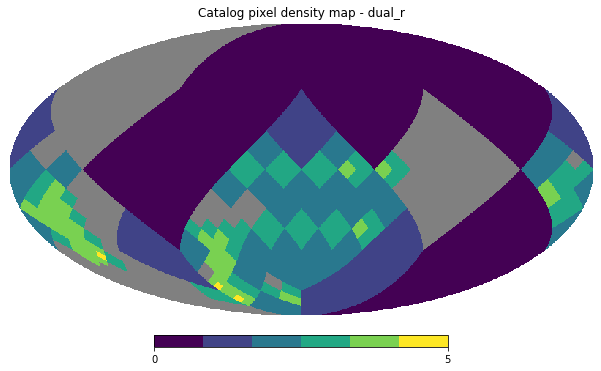

In [10]:
# Read the HiPSCat catalog metadata, it does not load any data, just healpix pixels and other metadata
splus_hipscat_catalog = Catalog.read_from_hipscat(cat_link)
plot_pixels(splus_hipscat_catalog)